In [1]:
import numpy as np
import pandas as pd

In [2]:
x = np.linspace(1, 10, 1000)
x_1 = np.linspace(1, 5, 1000)
x_2 = np.linspace(1, 10, 1000)

y_1_1 = np.cos(x) + x_1
y_1_2 = np.sin(x) + x_1

y_2_1 = np.sin(x) + x_2
y_2_2 = np.cos(x) + x_2

In [3]:
df = pd.DataFrame([y_1_1, y_1_2, y_2_1, y_2_2], index=['y_1_1', 'y_1_2', 'y_2_1', 'y_2_2']).T

<Axes: >

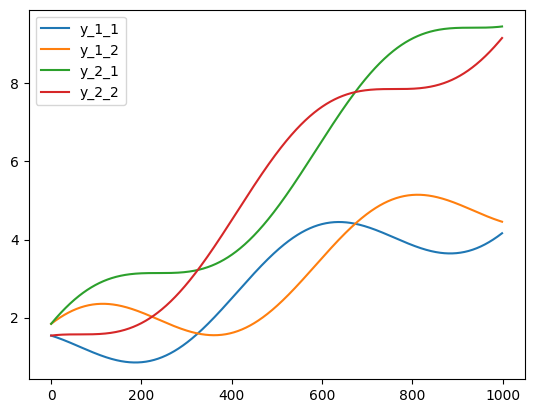

In [4]:
df.plot()

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
# Base
def calc_linear_coef(y):
    lr = LinearRegression()
    x = np.arange(1, len(y) + 1).reshape(-1, 1)
    lr.fit(x, y)
    return lr.coef_[0]


df.apply(calc_linear_coef, axis=0)

y_1_1    0.003994
y_1_2    0.003994
y_2_1    0.008999
y_2_2    0.008999
dtype: float64

In [9]:
# without intercept
def calc_linear_coef(y):
    lr = LinearRegression(fit_intercept=False)
    x = np.arange(1, len(y) + 1).reshape(-1, 1)
    lr.fit(x, y)
    return lr.coef_[0]


df.apply(calc_linear_coef, axis=0)

y_1_1    0.005264
y_1_2    0.005724
y_2_1    0.010722
y_2_2    0.010261
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
# with scaling
def calc_linear_coef(y, scaler):
    scaled_y = scaler.fit_transform(y.to_frame())
    lr = LinearRegression()
    x = np.arange(1, len(y) + 1).reshape(-1, 1)

    lr.fit(x, scaled_y.flatten())
    return lr.coef_[0]

In [23]:
scaler = MinMaxScaler()
df.apply(lambda x: calc_linear_coef(x, scaler), axis=0)

y_1_1    0.001110
y_1_2    0.001110
y_2_1    0.001182
y_2_2    0.001181
dtype: float64

In [24]:
scaler = StandardScaler()
df.apply(lambda x: calc_linear_coef(x, scaler), axis=0)

y_1_1    0.002972
y_1_2    0.002972
y_2_1    0.003348
y_2_2    0.003348
dtype: float64

In [25]:
# with scaling / with_out_intercept
def calc_linear_coef(y, scaler):
    scaled_y = scaler.fit_transform(y.to_frame())
    lr = LinearRegression(fit_intercept=False)
    x = np.arange(1, len(y) + 1).reshape(-1, 1)

    lr.fit(x, scaled_y.flatten())
    return lr.coef_[0]

In [26]:
scaler = MinMaxScaler()
df.apply(lambda x: calc_linear_coef(x, scaler), axis=0)

y_1_1    0.001109
y_1_2    0.000946
y_2_1    0.001046
y_2_2    0.001043
dtype: float64

In [27]:
scaler = StandardScaler()
df.apply(lambda x: calc_linear_coef(x, scaler), axis=0)

y_1_1    0.000742
y_1_2    0.000742
y_2_1    0.000836
y_2_2    0.000836
dtype: float64